# Preprocess Data
We use Pandas library for loading and pre-processing data.

In [1]:
import pandas as pd

Load the data which is given as a CSV file.

In [2]:
df = pd.read_csv("./datasets/heart_disease/heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Dataset Cleanup

The column names are a bit cryptic. It is difficult to understand the meaning. So we rename the columns to a more understandable one.

In [4]:
df.rename(columns = {
    "cp": "chest_pain",
    "trestbps": "resting_bp",
    "chol": "cholesterol",
    "fbs": "fasting_blood_sugar",
    "restecg": "resting_ecg",
    "thalach": "max_heart_rate",
    "exang": "exercise_angina",
    "oldpeak": "exercise_depression",
    "ca": "vessels_colored"
}, inplace = True)

In [5]:
df.head()

,age,sex,chest_pain,resting_bp,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,exercise_depression,slope,vessels_colored,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Most of the times, dataset is not clean. In this case, it is clean so we do not need to do anything but most of the time, it is not the case. Some data might be missing. Missing data is represented by **NaN** and can be found out by the **isna()** function.

Here, we sum up all the **NaN**s in each column in the dataset and view it. We see that there are no missing values.

In [6]:
df.isna().sum()

age                    0
sex                    0
chest_pain             0
resting_bp             0
cholesterol            0
fasting_blood_sugar    0
resting_ecg            0
max_heart_rate         0
exercise_angina        0
exercise_depression    0
slope                  0
vessels_colored        0
thal                   0
target                 0
dtype: int64

### One-Hot Encoding

Categorical data are a very common part of any dataset. This is data that can be divided into classes. For example, *gender* is a categorical variable. This is because there can be only 3 different genders. So it can be represented by three different numbers, say 0 for male, 1 for female and 2 for others.

For such columns, we perform One-Hot Encoding. This creates new features which are called *dummies*. It creates new variables for each of the different classes in the categorical variable.

In [7]:
chest_pain_dummies = pd.get_dummies(df["chest_pain"], prefix = "chest_pain")
resting_ecg_dummies = pd.get_dummies(df["resting_ecg"], prefix = "resting_ecg")
thal_dummies = pd.get_dummies(df["thal"], prefix = "thal")

Once one-hot encoding has been done. We do not need the previous columns. So we delete them.

In [8]:
df.drop(columns = ["chest_pain", "resting_ecg", "thal"], inplace = True)

We combine the new dataset (with the one-hot encoded values) with the old dataset.

In [9]:
df = df.join([chest_pain_dummies, resting_ecg_dummies, thal_dummies])

### Normalization of Data

Different data can be present in different scales. For example, some features can have values say within 0 and 1 and some others may have data within say 200 and 300. The neural network can go astray due to this scale difference and can give more weightage to the features with higher values.

For this reason, we normalize the data, which means, we bring all the data to a similar scale so that every feature can get equal weightage from the neural network.

In [10]:
# Normalize the dataset

def normalize_data(df):
    # Normalize the age
    min_age = df["age"].min()
    max_age = df["age"].max()
    df["age"] = df["age"].apply(lambda age: (age - min_age) / max_age)

    # Normalize the resting bp
    min_rest_bp = df["resting_bp"].min()
    max_rest_bp = df["resting_bp"].max()
    df["resting_bp"] = df["resting_bp"].apply(lambda bp: (bp - min_rest_bp) / max_rest_bp)

    # Normalize the cholesterol
    min_cholesterol = df["cholesterol"].min()
    max_cholesterol = df["cholesterol"].max()
    df["cholesterol"] = df["cholesterol"].apply(lambda chol: (chol - min_cholesterol) / max_cholesterol)

    # Normalize the max heart rate
    min_heartrate = df["max_heart_rate"].min()
    max_heartrate = df["max_heart_rate"].max()
    df["max_heart_rate"] = df["max_heart_rate"].apply(lambda rate: (rate - min_heartrate) / max_heartrate)

    # Normalize the depression due to exercise
    max_depression = df["exercise_depression"].max()
    df["exercise_depression"] = df["exercise_depression"].apply(lambda value: value / max_depression)

    # Normalize slope
    df["slope"] = df["slope"].apply(lambda value: value / 2.0)

    # Normalize vessels colored
    df["vessels_colored"] = df["vessels_colored"].apply(lambda value: value / 3.0)

    return df

normalized_df = normalize_data(df)

In [11]:
normalized_df.head()

,age,sex,resting_bp,cholesterol,fasting_blood_sugar,max_heart_rate,exercise_angina,exercise_depression,slope,vessels_colored,...,chest_pain_1,chest_pain_2,chest_pain_3,resting_ecg_0,resting_ecg_1,resting_ecg_2,thal_0,thal_1,thal_2,thal_3
0,0.441558,1,0.255,0.189716,1,0.391089,0,0.370968,0.0,0.0,...,0,0,1,1,0,0,0,1,0,0
1,0.103896,1,0.180,0.219858,0,0.574257,0,0.564516,0.0,0.0,...,0,1,0,0,1,0,0,0,1,0
2,0.155844,0,0.180,0.138298,0,0.500000,0,0.225806,1.0,0.0,...,1,0,0,1,0,0,0,0,1,0
3,0.350649,1,0.130,0.195035,0,0.529703,0,0.129032,1.0,0.0,...,1,0,0,0,1,0,0,0,1,0
4,0.363636,0,0.130,0.404255,0,0.455446,1,0.096774,1.0,0.0,...,0,0,0,0,1,0,0,0,1,0


We see that our dataset contains 303 examples and 22 columns out of which 21 are our features and 1 is our outcome (or target).

In [12]:
normalized_df.shape

(303, 22)

### Splitting of Data for Training and Testing

We need separate batches of data for training and testing our model. This is so that we can test our model on a fresh set of data which the model has never seen. This gives a more accurate picture of the efficiency of our model.

First, we split our dataset into two parts. One which contains all our features. And another, which contains our target (or label).

In [13]:
# Separate the features and labels from the dataset
X = normalized_df.drop(columns = "target")
y = normalized_df["target"]

Then, we split our data into 2 parts - one for training and one for testing in a randomized way.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Perform ML

### Model Creation and Training

We are using the Tensorflow library and specifically Keras, for performing our ML activities.

We use a Sequential model here. This means that our layers within the model are arranged in a sequential fashion. Our first layer is a Dense layer with 21 nodes corresponding to the 21 features (or inputs) we have. As each of our example is only a 1D array of 21 different values, the *input_shape* is only 21.

Then, we have a single hidden layer with 50 nodes. This is also a dense layer. It has an activation funtion of *relu* or Rectified Linear Unit. This activation function is commonly used when we are working with non-linear data.

Lastly, our output layer contains just one node where a value towards 1 would mean heart disease is present and a value of 0 would mean heart disease is not present.

The metric we are looking forward to optimize is *Accuracy* and the loss function which we are using to calculate this metric is *Binary Crossentropy*. Finally, the optimizer which we are using to optimize this metric by changing the values of weights and biases within the model is *Adam*.

In [1]:
import tensorflow as tf

In [2]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(21, input_shape = [21]),
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(1)
])

model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

We print a summary of our model which shows the configurations we have setup just now.

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 21)                462       
                                                                 
 dense_1 (Dense)             (None, 50)                1100      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1,613
Trainable params: 1,613
Non-trainable params: 0
_________________________________________________________________


We also visualize our network in a graphical format.

In [4]:
from ann_visualizer.visualize import ann_viz
import graphviz

graph = ann_viz(model, title = "Heart Disease Model")

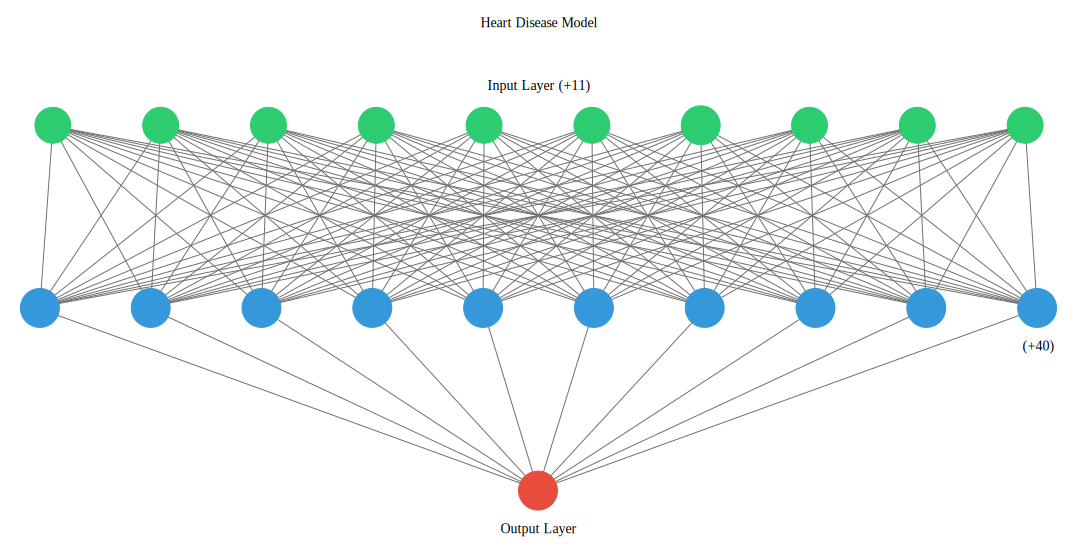

In [5]:
graph

After setting up the model, we train it with the training set for 50 epochs.

In [20]:
model.fit(X_train, y_train, epochs = 50)

Epoch 1/50
8/8 [==============================] - 1s 3ms/step - loss: 0.6863 - accuracy: 0.7355
Epoch 2/50
8/8 [==============================] - 0s 3ms/step - loss: 0.5685 - accuracy: 0.7727
Epoch 3/50
8/8 [==============================] - 0s 3ms/step - loss: 0.5711 - accuracy: 0.8017
Epoch 4/50
8/8 [==============================] - 0s 3ms/step - loss: 0.5902 - accuracy: 0.8140
Epoch 5/50
8/8 [==============================] - 0s 3ms/step - loss: 0.5732 - accuracy: 0.8223
Epoch 6/50
8/8 [==============================] - 0s 3ms/step - loss: 0.5603 - accuracy: 0.8430
Epoch 7/50
8/8 [==============================] - 0s 3ms/step - loss: 0.5495 - accuracy: 0.8306
Epoch 8/50
8/8 [==============================] - 0s 3ms/step - loss: 0.5399 - accuracy: 0.8306
Epoch 9/50
8/8 [==============================] - 0s 3ms/step - loss: 0.5368 - accuracy: 0.8430
Epoch 10/50
8/8 [==============================] - 0s 3ms/step - loss: 0.5275 - accuracy: 0.8430
Epoch 11/50
8/8 [======================

### Model Evaluation

Lastly, we evaluate the model by calculating our desired metric over the testing set.

In [21]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 1.1023 - accuracy: 0.7705


[1.1023201942443848, 0.7704917788505554]

# Model Accuracy
For better accuracy, we have used three hidden layers instead of one with 40 epochs.

In [22]:
model_optimised = tf.keras.Sequential([
    tf.keras.layers.Dense(21, input_shape = [21]),
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(1)
])

model_optimised.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

We print a summary of our optimised model which shows the configurations we have setup just now.

In [23]:
model_optimised.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 21)                462       
                                                                 
 dense_4 (Dense)             (None, 50)                1100      
                                                                 
 dense_5 (Dense)             (None, 50)                2550      
                                                                 
 dense_6 (Dense)             (None, 50)                2550      
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 6,713
Trainable params: 6,713
Non-trainable params: 0
_________________________________________________________________


After setting up the optimised model, we train it with the training set for 40 epochs.

In [25]:
model_optimised.fit(X_train, y_train, epochs = 40)

Epoch 1/40
8/8 [==============================] - 0s 5ms/step - loss: 0.1543 - accuracy: 0.9174
Epoch 2/40
8/8 [==============================] - 0s 4ms/step - loss: 0.1481 - accuracy: 0.9256
Epoch 3/40
8/8 [==============================] - 0s 4ms/step - loss: 0.1477 - accuracy: 0.9298
Epoch 4/40
8/8 [==============================] - 0s 4ms/step - loss: 0.1449 - accuracy: 0.9256
Epoch 5/40
8/8 [==============================] - 0s 4ms/step - loss: 0.1433 - accuracy: 0.9256
Epoch 6/40
8/8 [==============================] - 0s 4ms/step - loss: 0.1369 - accuracy: 0.9339
Epoch 7/40
8/8 [==============================] - 0s 4ms/step - loss: 0.1366 - accuracy: 0.9298
Epoch 8/40
8/8 [==============================] - 0s 4ms/step - loss: 0.1340 - accuracy: 0.9380
Epoch 9/40
8/8 [==============================] - 0s 4ms/step - loss: 0.1282 - accuracy: 0.9421
Epoch 10/40
8/8 [==============================] - 0s 4ms/step - loss: 0.1268 - accuracy: 0.9421
Epoch 11/40
8/8 [======================

## Model Evaluation
Lastly, we evaluate the optimised model by calculating our desired metric over the testing set.

In [26]:
model_optimised.evaluate(X_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 1.2831 - accuracy: 0.8197


[1.2831315994262695, 0.8196721076965332]

# Observations
After taking 10 different sets, it is seen that for the model having 1 input layer, 1 hidden layer and 1 output layer with 50 epochs, the Mean Training Accuracy is 78.51% and the Mean Testing Accuracy is 75.58%.

For the model having 1 input layer, 3 hidden layers and 1 output layer with 40 epochs, the Mean Training Accuracy is 87.31% and the Mean Testing Accuracy is 76.40%.

Hence, it can be concluded that the second model is more optimised as both the training accuracy and the testing accuracy have increased.
